https://blueskyproject.io/bluesky/callbacks.html?highlight=subscribe#callbacks-for-visualization-fitting


In [2]:
from bluesky import RunEngine

RE = RunEngine({})

from bluesky.callbacks.best_effort import BestEffortCallback
bec = BestEffortCallback()

# Send all metadata/data captured to the BestEffortCallback.
RE.subscribe(bec)

#Get the databroker https://gist.github.com/untzag/53281819709b1058c7708a250cbd3676
from databroker.v2 import temp
db = temp()

# Insert all metadata/data captured into db.
RE.subscribe(db.v1.insert)


1

In [2]:
from ophyd.sim import det, motor
from bluesky.plans import scan



Transient Scan ID: 1     Time: 2021-07-02 10:26:48
Persistent Unique Scan ID: '5df5dba0-53e3-4218-bb35-f62e8f650895'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |      motor |        det |
+-----------+------------+------------+------------+
|         1 | 10:26:49.2 |     -1.000 |      0.607 |
|         2 | 10:26:49.3 |     -0.778 |      0.739 |
|         3 | 10:26:49.3 |     -0.556 |      0.857 |
|         4 | 10:26:49.4 |     -0.333 |      0.946 |
|         5 | 10:26:49.4 |     -0.111 |      0.994 |
|         6 | 10:26:49.4 |      0.111 |      0.994 |
|         7 | 10:26:49.5 |      0.333 |      0.946 |
|         8 | 10:26:49.5 |      0.556 |      0.857 |
|         9 | 10:26:49.5 |      0.778 |      0.739 |
|        10 | 10:26:49.6 |      1.000 |      0.607 |
+-----------+------------+------------+------------+
generator scan ['5df5dba0'] (scan num: 1)





('5df5dba0-53e3-4218-bb35-f62e8f650895',)

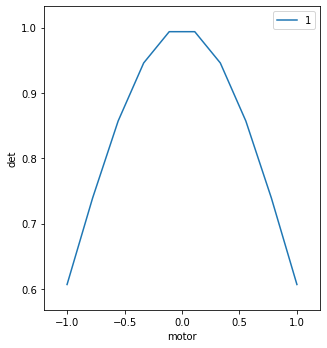

In [3]:
RE(scan([det],motor,-1,1,10))


In [3]:
from bluesky.callbacks import CallbackBase

class MyCallback(CallbackBase):
    def start(self, doc):
        print("I got a new 'start' Document")
        # Do something
    def descriptor(self, doc):
        print("I got a new 'descriptor' Document")
        # Do something
    def event(self, doc):
        print("I got a new 'event' Document")
        # Do something
    def stop(self, doc):
        print("I got a new 'stop' Document")
        # Do something



Transient Scan ID: 2     Time: 2021-07-02 10:26:54
Persistent Unique Scan ID: '12128b75-421f-4b7e-9518-4f1168d7c582'
I got a new 'start' Document
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |      motor |        det |
+-----------+------------+------------+------------+
I got a new 'descriptor' Document
|         1 | 10:26:54.0 |     -1.000 |      0.607 |
I got a new 'event' Document
|         2 | 10:26:54.1 |     -0.778 |      0.739 |
I got a new 'event' Document
|         3 | 10:26:54.1 |     -0.556 |      0.857 |
I got a new 'event' Document
|         4 | 10:26:54.2 |     -0.333 |      0.946 |
I got a new 'event' Document
|         5 | 10:26:54.2 |     -0.111 |      0.994 |
I got a new 'event' Document
|         6 | 10:26:54.2 |      0.111 |      0.994 |
I got a new 'event' Document
|         7 | 10:26:54.3 |      0.333 |      0.946 |
I got a new 'event' Document
|         8 | 10:26:54.3 |      0.556 |      0.857 |
I got a ne

('12128b75-421f-4b7e-9518-4f1168d7c582',)

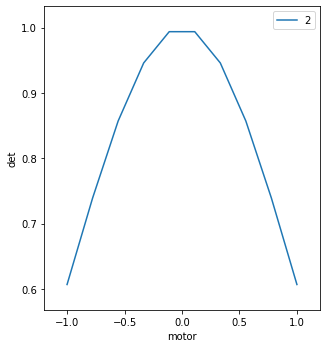

In [5]:
RE(scan([det],motor,-1,1,10),MyCallback())

In [6]:
RE.subscribe(MyCallback())

3



Transient Scan ID: 3     Time: 2021-07-02 10:26:59
Persistent Unique Scan ID: '3c9149bc-21d0-4d32-93bf-3434a01ab94d'
I got a new 'start' Document
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |      motor |        det |
+-----------+------------+------------+------------+
I got a new 'descriptor' Document
|         1 | 10:26:59.1 |     -1.000 |      0.607 |
I got a new 'event' Document
|         2 | 10:26:59.1 |     -0.778 |      0.739 |
I got a new 'event' Document
|         3 | 10:26:59.2 |     -0.556 |      0.857 |
I got a new 'event' Document
|         4 | 10:26:59.2 |     -0.333 |      0.946 |
I got a new 'event' Document
|         5 | 10:26:59.3 |     -0.111 |      0.994 |
I got a new 'event' Document
|         6 | 10:26:59.3 |      0.111 |      0.994 |
I got a new 'event' Document
|         7 | 10:26:59.4 |      0.333 |      0.946 |
I got a new 'event' Document
|         8 | 10:26:59.4 |      0.556 |      0.857 |
I got a ne

('3c9149bc-21d0-4d32-93bf-3434a01ab94d',)

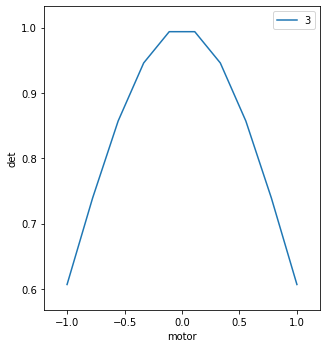

In [7]:
RE(scan([det],motor,-1,1,10))


In [7]:
def move_some_motor(motor, pos):
    
    yield from mv(motor, pos)

from bluesky.callbacks import CallbackBase


def callback(CallbackBase):
 
    print(f"{status} is done")
    
from ophyd.sim import motor
from bluesky.plan_stubs import mv
motor.delay = 1
RE(move_some_motor(motor,1.6),callback())

TypeError: callback() missing 1 required positional argument: 'status'